In [1]:
import os
os.chdir('/home/solozabal/Documents/projects/TFBind')

In [2]:
import numpy as np
import pandas as pd

In [3]:
TF = 'MITF'

df = pd.read_csv(f'datasets/{TF}/dataset_{TF}_encoded.csv')

In [4]:
df

,Change,Position,ln(I),Plus_strand,Minus_strand,Groove_major,Groove_minor
0,AA,1,-0.312518,ATATCACGTGATAC,GTATCACGTGATAA,"[['A', 'D', 'D', 'A'], ['M', 'A', 'D', 'A'], [...","[['A', 'n', 'n', 'A'], ['x', 'A', 'n', 'A'], [..."
1,AA,2,-0.021256,GAATCACGTGATAC,GTATCACGTGATAC,"[['A', 'A', 'D', 'n'], ['A', 'D', 'D', 'A'], [...","[['A', 'D', 'A', 'x'], ['A', 'n', 'n', 'A'], [..."
2,AA,3,-0.528420,GTATCACGTGATAC,GTATCACGTGAAAC,"[['A', 'A', 'D', 'n'], ['M', 'A', 'D', 'A'], [...","[['A', 'D', 'A', 'x'], ['x', 'A', 'n', 'A'], [..."
3,AA,4,-1.084303,GTAACACGTGATAC,GTATCACGTGATAC,"[['A', 'A', 'D', 'n'], ['M', 'A', 'D', 'A'], [...","[['A', 'D', 'A', 'x'], ['x', 'A', 'n', 'A'], [..."
4,AA,5,-2.494835,GTATAACGTGATAC,GTATCACGTAATAC,"[['A', 'A', 'D', 'n'], ['M', 'A', 'D', 'A'], [...","[['A', 'D', 'A', 'x'], ['x', 'A', 'n', 'A'], [..."
...,...,...,...,...,...,...,...
1257,gg,10,-1.605242,GTATCACGTgATAC,GTATgACGTGATAC,"[['A', 'A', 'D', 'n'], ['M', 'A', 'D', 'A'], [...","[['A', 'D', 'A', 'x'], ['x', 'A', 'n', 'A'], [..."
1258,gg,11,-1.391758,GTATCACGTGgTAC,GTAgCACGTGATAC,"[['A', 'A', 'D', 'n'], ['M', 'A', 'D', 'A'], [...","[['A', 'D', 'A', 'x'], ['x', 'A', 'n', 'A'], [..."
1259,gg,12,-0.879398,GTATCACGTGAgAC,GTgTCACGTGATAC,"[['A', 'A', 'D', 'n'], ['M', 'A', 'D', 'A'], [...","[['A', 'D', 'A', 'x'], ['x', 'A', 'n', 'A'], [..."
1260,gg,13,-0.252286,GTATCACGTGATgC,GgATCACGTGATAC,"[['A', 'A', 'D', 'n'], ['M', 'A', 'D', 'A'], [...","[['A', 'D', 'A', 'x'], ['x', 'A', 'n', 'A'], [..."


In [5]:
from src.utils import categorize_change

df["Category"] = df["Change"].apply(categorize_change)

In [6]:
from ast import literal_eval
from src.encode import one_hot_encode_grooves


def parse_literal(value):
    return value if isinstance(value, list) else literal_eval(value)

df["Groove_major"] = df["Groove_major"].map(parse_literal)
df["Groove_minor"] = df["Groove_minor"].map(parse_literal)
df["Groove_major_OH"], df["Groove_minor_OH"] = zip(
    *df.apply(lambda r: one_hot_encode_grooves(r["Groove_major"], r["Groove_minor"]), axis=1)
)

In [7]:
df

,Change,Position,ln(I),Plus_strand,Minus_strand,Groove_major,Groove_minor,Category,Groove_major_OH,Groove_minor_OH
0,AA,1,-0.312518,ATATCACGTGATAC,GTATCACGTGATAA,"[[A, D, D, A], [M, A, D, A], [A, D, A, M], [M,...","[[A, n, n, A], [x, A, n, A], [A, n, A, x], [x,...",mismatch,"[[[0, 0, 0, 1], [0, 0, 1, 0], [0, 0, 1, 0], [0...","[[[0, 0, 0, 1], [1, 0, 0, 0], [1, 0, 0, 0], [0..."
1,AA,2,-0.021256,GAATCACGTGATAC,GTATCACGTGATAC,"[[A, A, D, n], [A, D, D, A], [A, D, A, M], [M,...","[[A, D, A, x], [A, n, n, A], [A, n, A, x], [x,...",mismatch,"[[[0, 0, 0, 1], [0, 0, 0, 1], [0, 0, 1, 0], [1...","[[[0, 0, 0, 1], [0, 0, 1, 0], [0, 0, 0, 1], [0..."
2,AA,3,-0.528420,GTATCACGTGATAC,GTATCACGTGAAAC,"[[A, A, D, n], [M, A, D, A], [A, D, D, A], [M,...","[[A, D, A, x], [x, A, n, A], [A, n, n, A], [x,...",mismatch,"[[[0, 0, 0, 1], [0, 0, 0, 1], [0, 0, 1, 0], [1...","[[[0, 0, 0, 1], [0, 0, 1, 0], [0, 0, 0, 1], [0..."
3,AA,4,-1.084303,GTAACACGTGATAC,GTATCACGTGATAC,"[[A, A, D, n], [M, A, D, A], [A, D, A, M], [A,...","[[A, D, A, x], [x, A, n, A], [A, n, A, x], [A,...",mismatch,"[[[0, 0, 0, 1], [0, 0, 0, 1], [0, 0, 1, 0], [1...","[[[0, 0, 0, 1], [0, 0, 1, 0], [0, 0, 0, 1], [0..."
4,AA,5,-2.494835,GTATAACGTGATAC,GTATCACGTAATAC,"[[A, A, D, n], [M, A, D, A], [A, D, A, M], [M,...","[[A, D, A, x], [x, A, n, A], [A, n, A, x], [x,...",mismatch,"[[[0, 0, 0, 1], [0, 0, 0, 1], [0, 0, 1, 0], [1...","[[[0, 0, 0, 1], [0, 0, 1, 0], [0, 0, 0, 1], [0..."
...,...,...,...,...,...,...,...,...,...,...
1257,gg,10,-1.605242,GTATCACGTgATAC,GTATgACGTGATAC,"[[A, A, D, n], [M, A, D, A], [A, D, A, M], [M,...","[[A, D, A, x], [x, A, n, A], [A, n, A, x], [x,...",mod_on_both_bases,"[[[0, 0, 0, 1], [0, 0, 0, 1], [0, 0, 1, 0], [1...","[[[0, 0, 0, 1], [0, 0, 1, 0], [0, 0, 0, 1], [0..."
1258,gg,11,-1.391758,GTATCACGTGgTAC,GTAgCACGTGATAC,"[[A, A, D, n], [M, A, D, A], [A, D, A, M], [M,...","[[A, D, A, x], [x, A, n, A], [A, n, A, x], [x,...",mod_on_both_bases,"[[[0, 0, 0, 1], [0, 0, 0, 1], [0, 0, 1, 0], [1...","[[[0, 0, 0, 1], [0, 0, 1, 0], [0, 0, 0, 1], [0..."
1259,gg,12,-0.879398,GTATCACGTGAgAC,GTgTCACGTGATAC,"[[A, A, D, n], [M, A, D, A], [A, D, A, M], [M,...","[[A, D, A, x], [x, A, n, A], [A, n, A, x], [x,...",mod_on_both_bases,"[[[0, 0, 0, 1], [0, 0, 0, 1], [0, 0, 1, 0], [1...","[[[0, 0, 0, 1], [0, 0, 1, 0], [0, 0, 0, 1], [0..."
1260,gg,13,-0.252286,GTATCACGTGATgC,GgATCACGTGATAC,"[[A, A, D, n], [M, A, D, A], [A, D, A, M], [M,...","[[A, D, A, x], [x, A, n, A], [A, n, A, x], [x,...",mod_on_both_bases,"[[[0, 0, 0, 1], [0, 0, 0, 1], [0, 0, 1, 0], [1...","[[[0, 0, 0, 1], [0, 0, 1, 0], [0, 0, 0, 1], [0..."


In [8]:
# Create X_train by concatenating Groove_major_OH and Groove_minor_OH along axis=1
X = np.stack([
    np.concatenate([np.asarray(mj, dtype=np.int8), np.asarray(mn, dtype=np.int8)], axis=1)
    for mj, mn in zip(df["Groove_major_OH"], df["Groove_minor_OH"])
], axis=0).astype(np.float32)

df["encoded_sequence"] = list(X)

In [9]:
df.iloc[0]["encoded_sequence"].shape

(14, 8, 4)

In [10]:
# Specify modifications to exclude from training so they are only used for prediction
available_mods = sorted(cat for cat in df["Category"].unique() if cat != "mismatch")

mods_to_exclude = [
    # "dUTP",
    "5mC",
]

unknown_mods = sorted(set(mods_to_exclude) - set(available_mods))
if unknown_mods:
    raise ValueError(f"Unknown categories in mods_to_exclude: {unknown_mods}")

df["UsedForPrediction"] = df["Category"].isin(mods_to_exclude)
df_test = df[df["UsedForPrediction"]].copy()
df_train = df[~df["UsedForPrediction"]].copy()

train_categories = sorted(df_train["Category"].unique())
heldout_mods = sorted(df_test["Category"].unique())

print(f"Available modifications: {available_mods}")
print(f"Training categories (all except selected exclusions): {train_categories}")
print(f"Held-out modifications for prediction: {heldout_mods}")
print(f"Train samples: {len(df_train)}, held-out samples: {len(df_test)}")


Available modifications: ['5mC', '6mA', '7dA', '7dG', 'D', 'I', 'dUTP', 'mod_on_both_bases']
Training categories (all except selected exclusions): ['6mA', '7dA', '7dG', 'D', 'I', 'dUTP', 'mismatch', 'mod_on_both_bases']
Held-out modifications for prediction: ['5mC']
Train samples: 1166, held-out samples: 96


In [11]:
# Create training and testing datasets
X_train = np.stack(df_train["encoded_sequence"].to_numpy(), axis=0)
y_train = df_train["ln(I)"].to_numpy()

X_test = np.stack(df_test["encoded_sequence"].to_numpy(), axis=0)
y_test = df_test["ln(I)"].to_numpy()

In [12]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((1166, 14, 8, 4), (1166,), (96, 14, 8, 4), (96,))

In [13]:
# Flatten encoded groove tensors for linear model
n_samples, seq_length, n_features, n_encoding = X_train.shape
X_train = X_train.reshape((n_samples, seq_length * n_features * n_encoding))

X_test = X_test.reshape((X_test.shape[0], seq_length * n_features * n_encoding))

In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [15]:
linear_reg = LinearRegression()
linear_reg

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [16]:
linear_reg.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [17]:
score = linear_reg.score(X_train, y_train)
score

0.883406295605577

In [18]:
kfold = KFold(n_splits=5, shuffle=True, random_state=0)
kf_cv_scores = cross_val_score(linear_reg, X_train, y_train, cv=kfold)
kf_cv_scores.mean()

np.float64(0.8418979260795363)

In [19]:
ypred = linear_reg.predict(X_test)
mae = mean_absolute_error(y_test, ypred)
mse = mean_squared_error(y_test, ypred)

mae, mse

(0.30058984778932424, 0.16317158266816553)

In [20]:
df_test['y_pred'] = ypred

In [21]:
df_test

,Change,Position,ln(I),Plus_strand,Minus_strand,Groove_major,Groove_minor,Category,Groove_major_OH,Groove_minor_OH,encoded_sequence,UsedForPrediction,y_pred
101,AX,1,-0.011960,ATATCACGTGATAC,GTATCACGTGATAX,"[[A, D, D, M], [M, A, D, A], [A, D, A, M], [M,...","[[A, n, A, x], [x, A, n, A], [A, n, A, x], [x,...",5mC,"[[[0, 0, 0, 1], [0, 0, 1, 0], [0, 0, 1, 0], [0...","[[[0, 0, 0, 1], [1, 0, 0, 0], [0, 0, 0, 1], [0...","[[[0.0, 0.0, 0.0, 1.0], [0.0, 0.0, 1.0, 0.0], ...",True,-0.284165
102,AX,2,0.108933,GAATCACGTGATAC,GTATCACGTGATXC,"[[A, A, D, n], [A, D, D, M], [A, D, A, M], [M,...","[[A, D, A, x], [A, n, A, x], [A, n, A, x], [x,...",5mC,"[[[0, 0, 0, 1], [0, 0, 0, 1], [0, 0, 1, 0], [1...","[[[0, 0, 0, 1], [0, 0, 1, 0], [0, 0, 0, 1], [0...","[[[0.0, 0.0, 0.0, 1.0], [0.0, 0.0, 0.0, 1.0], ...",True,-0.094893
103,AX,3,-0.306606,GTATCACGTGATAC,GTATCACGTGAXAC,"[[A, A, D, n], [M, A, D, A], [A, D, D, M], [M,...","[[A, D, A, x], [x, A, n, A], [A, n, A, x], [x,...",5mC,"[[[0, 0, 0, 1], [0, 0, 0, 1], [0, 0, 1, 0], [1...","[[[0, 0, 0, 1], [0, 0, 1, 0], [0, 0, 0, 1], [0...","[[[0.0, 0.0, 0.0, 1.0], [0.0, 0.0, 0.0, 1.0], ...",True,-0.537547
104,AX,4,-1.383345,GTAACACGTGATAC,GTATCACGTGXTAC,"[[A, A, D, n], [M, A, D, A], [A, D, A, M], [A,...","[[A, D, A, x], [x, A, n, A], [A, n, A, x], [A,...",5mC,"[[[0, 0, 0, 1], [0, 0, 0, 1], [0, 0, 1, 0], [1...","[[[0, 0, 0, 1], [0, 0, 1, 0], [0, 0, 0, 1], [0...","[[[0.0, 0.0, 0.0, 1.0], [0.0, 0.0, 0.0, 1.0], ...",True,-1.081684
105,AX,5,-2.486870,GTATAACGTGATAC,GTATCACGTXATAC,"[[A, A, D, n], [M, A, D, A], [A, D, A, M], [M,...","[[A, D, A, x], [x, A, n, A], [A, n, A, x], [x,...",5mC,"[[[0, 0, 0, 1], [0, 0, 0, 1], [0, 0, 1, 0], [1...","[[[0, 0, 0, 1], [0, 0, 1, 0], [0, 0, 0, 1], [0...","[[[0.0, 0.0, 0.0, 1.0], [0.0, 0.0, 0.0, 1.0], ...",True,-2.460922
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1009,XT,8,-2.072335,GTATCACXTGATAC,GTATCATGTGATAC,"[[A, A, D, n], [M, A, D, A], [A, D, A, M], [M,...","[[A, D, A, x], [x, A, n, A], [A, n, A, x], [x,...",5mC,"[[[0, 0, 0, 1], [0, 0, 0, 1], [0, 0, 1, 0], [1...","[[[0, 0, 0, 1], [0, 0, 1, 0], [0, 0, 0, 1], [0...","[[[0.0, 0.0, 0.0, 1.0], [0.0, 0.0, 0.0, 1.0], ...",True,-2.294846
1010,XT,9,-1.369090,GTATCACGXGATAC,GTATCTCGTGATAC,"[[A, A, D, n], [M, A, D, A], [A, D, A, M], [M,...","[[A, D, A, x], [x, A, n, A], [A, n, A, x], [x,...",5mC,"[[[0, 0, 0, 1], [0, 0, 0, 1], [0, 0, 1, 0], [1...","[[[0, 0, 0, 1], [0, 0, 1, 0], [0, 0, 0, 1], [0...","[[[0.0, 0.0, 0.0, 1.0], [0.0, 0.0, 0.0, 1.0], ...",True,-1.355595
1011,XT,10,-2.420312,GTATCACGTXATAC,GTATTACGTGATAC,"[[A, A, D, n], [M, A, D, A], [A, D, A, M], [M,...","[[A, D, A, x], [x, A, n, A], [A, n, A, x], [x,...",5mC,"[[[0, 0, 0, 1], [0, 0, 0, 1], [0, 0, 1, 0], [1...","[[[0, 0, 0, 1], [0, 0, 1, 0], [0, 0, 0, 1], [0...","[[[0.0, 0.0, 0.0, 1.0], [0.0, 0.0, 0.0, 1.0], ...",True,-2.831889
1012,XT,11,-0.854164,GTATCACGTGXTAC,GTATCACGTGATAC,"[[A, A, D, n], [M, A, D, A], [A, D, A, M], [M,...","[[A, D, A, x], [x, A, n, A], [A, n, A, x], [x,...",5mC,"[[[0, 0, 0, 1], [0, 0, 0, 1], [0, 0, 1, 0], [1...","[[[0, 0, 0, 1], [0, 0, 1, 0], [0, 0, 0, 1], [0...","[[[0.0, 0.0, 0.0, 1.0], [0.0, 0.0, 0.0, 1.0], ...",True,-0.403427


In [22]:
from sklearn.metrics import r2_score

y_pred = df_test['y_pred']
r2 = r2_score(y_test, y_pred)
r2

0.7792146405157483

/tmp/ipykernel_613766/2284543784.py:27: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(g['ln(I)'], g['y_pred'], s=18, marker='.', alpha=0.85, c=colors.get(cat, None))


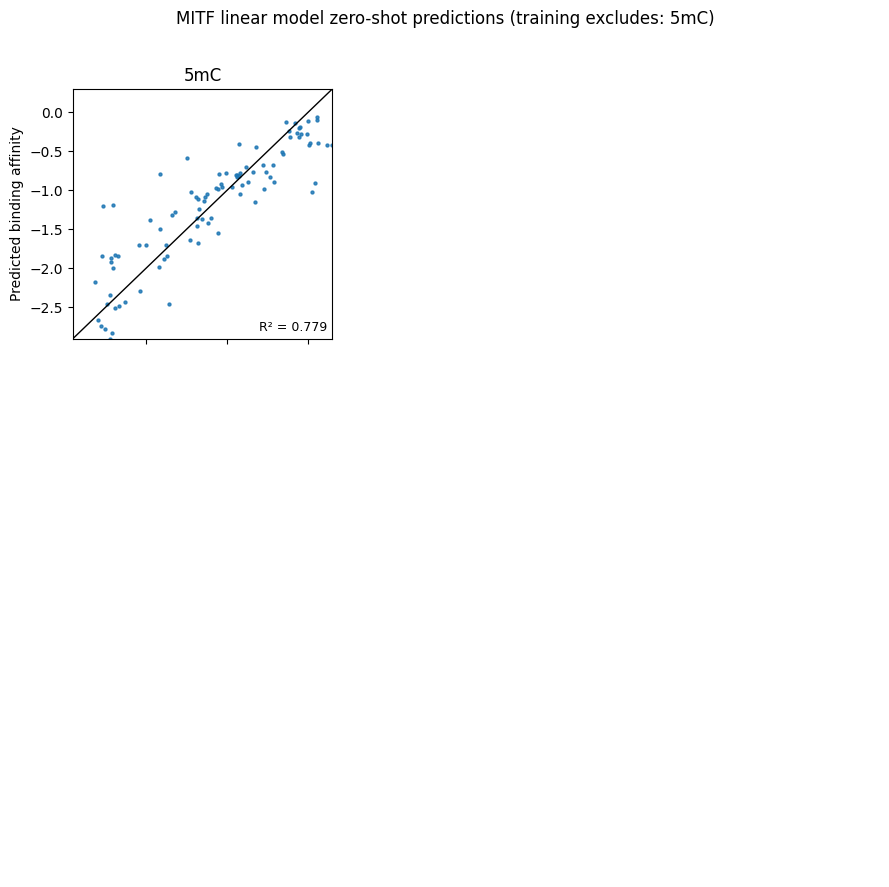

In [23]:
# 3x3 grid of per-category scatter plots with R^2 annotated
from matplotlib import pyplot as plt

from src.constants import COLOR_MODS

# Use existing color mapping if available; otherwise create a simple one
cats_present = sorted(df_test['Category'].unique().tolist())
if 'colors' in globals():
    order = [c for c in COLOR_MODS.keys() if c in cats_present]
    order.extend([c for c in cats_present if c not in order])
else:
    order = cats_present
    cmap = plt.get_cmap('tab10')
    colors = {cat: cmap(i % 10) for i, cat in enumerate(order)}

# Global axis limits for comparability
p1 = max(df_test['y_pred'].max(), df_test['ln(I)'].max())
p2 = min(df_test['y_pred'].min(), df_test['ln(I)'].min())

fig, axes = plt.subplots(3, 3, figsize=(9, 9), sharex=True, sharey=True)
axes = axes.ravel()

for i, cat in enumerate(order[:9]):
    ax = axes[i]
    g = df_test[df_test['Category'] == cat]

    ax.scatter(g['ln(I)'], g['y_pred'], s=18, marker='.', alpha=0.85, c=colors.get(cat, None))
    ax.plot([p2, p1], [p2, p1], 'k-', linewidth=1)
    ax.set_xlim([p2, p1])
    ax.set_ylim([p2, p1])

    # Compute R^2 safely
    try:
        r2_cat = r2_score(g['ln(I)'], g['y_pred']) if len(g) >= 2 else float('nan')
    except Exception:
        r2_cat = float('nan')

    ax.set_title(f"{cat}")
    label = f"R^2 = {r2_cat:.3f}" if r2_cat == r2_cat else 'R^2 = N/A'
    ax.text(0.98, 0.02, label,
            transform=ax.transAxes, ha='right', va='bottom',
            bbox=dict(boxstyle='round,pad=0.2', fc='white', ec='none', alpha=0.7), fontsize=9)

# Hide unused subplots if fewer than 9 categories
for j in range(len(order), 9):
    axes[j].axis('off')

# Label only outer axes
for ax in axes[6:9]:
    ax.set_xlabel('Experimental binding affinity')
for ax in axes[::3]:
    ax.set_ylabel('Predicted binding affinity')

mods_str = ', '.join(mods_to_exclude) if len(mods_to_exclude) else 'none'
mods_fname = '_'.join(mods_to_exclude) if len(mods_to_exclude) else 'none'
fig.suptitle(
    f"{TF} linear model zero-shot predictions "
    f"(training excludes: {mods_str})",
    fontsize=12
)
plt.tight_layout(rect=[0, 0, 1, 0.97])

# Save pdf
plt.savefig(f"plots/{TF}_linear_zeroshot_excluding_{mods_fname}.pdf")


In [24]:
cats_present

['5mC']